# 🏡 Análisis de Precios de Vivienda - Kaggle Housing Dataset
Este proyecto consiste en un análisis exploratorio de datos (EDA) y modelado predictivo sobre un conjunto de datos de precios de vivienda, proveniente de la competencia de Kaggle: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).

## 📌 Objetivo
Desarrollar un modelo de regresión lineal que permita predecir el precio de venta (`SalePrice`) de viviendas a partir de características numéricas del conjunto de datos
## 🧰 Herramientas utilizadas

- Python
- Pandas y NumPy (manipulación de datos)
- Matplotlib y Seaborn (visualización)
- Scikit-learn (modelado y evaluación)
- Statsmodels (análisis estadístico).



In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [4]:
# Cargar el conjunto de datos
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Revisión rápida de las primeras filas
print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
# Estadísticas descriptivas
print(train.describe())

# Verificar valores nulos
print(train.isnull().sum())


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [6]:
train.notnull().apply(pd.Series.value_counts)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
False,NaN,NaN,NaN,259,NaN,NaN,1369,NaN,NaN,NaN,...,NaN,1453,1179,1406,NaN,NaN,NaN,NaN,NaN,NaN
True,1460.0,1460.0,1460.0,1201,1460.0,1460.0,91,1460.0,1460.0,1460.0,...,1460.0,7,281,54,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0


In [7]:
# Seleccionar las columnas más relevantes para el modelo
important_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 
                  'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']

In [5]:
# Filtrar el DataFrame con esas columnas
df_important = train[important_cols]

# Revisar los valores nulos en estas columnas
print(df_important.isnull().sum())

# Manejar los valores nulos
# Imputar valores nulos en columnas numéricas (con la mediana por ejemplo)
df_important['GarageCars'].fillna(df_important['GarageCars'].median(), inplace=True)
df_important['GarageArea'].fillna(df_important['GarageArea'].median(), inplace=True)
df_important['TotalBsmtSF'].fillna(df_important['TotalBsmtSF'].median(), inplace=True)
df_important['1stFlrSF'].fillna(df_important['1stFlrSF'].median(), inplace=True)
df_important['FullBath'].fillna(df_important['FullBath'].median(), inplace=True)
df_important['TotRmsAbvGrd'].fillna(df_important['TotRmsAbvGrd'].median(), inplace=True)
df_important['YearBuilt'].fillna(df_important['YearBuilt'].median(), inplace=True)
df_important['YearRemodAdd'].fillna(df_important['YearRemodAdd'].median(), inplace=True)

# Verificar que ya no hay valores nulos
print(df_important.isnull().sum())

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64


C:\Users\elcar\AppData\Local\Temp\ipykernel_23124\1299072753.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_important['GarageCars'].fillna(df_important['GarageCars'].median(), inplace=True)
C:\Users\elcar\AppData\Local\Temp\ipykernel_23124\1299072753.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important['GarageCars'].fillna(

In [8]:
# Definimos las variables X (features) y Y (target)
X = train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
Y = train['SalePrice']

In [9]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Entrenar el modelo
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [11]:
from sklearn.metrics import mean_absolute_error

# Hacer predicciones
y_pred = model.predict(X_valid)

# Evaluar el modelo
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 21301.960076032792


C:\Users\elcar\Documents\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


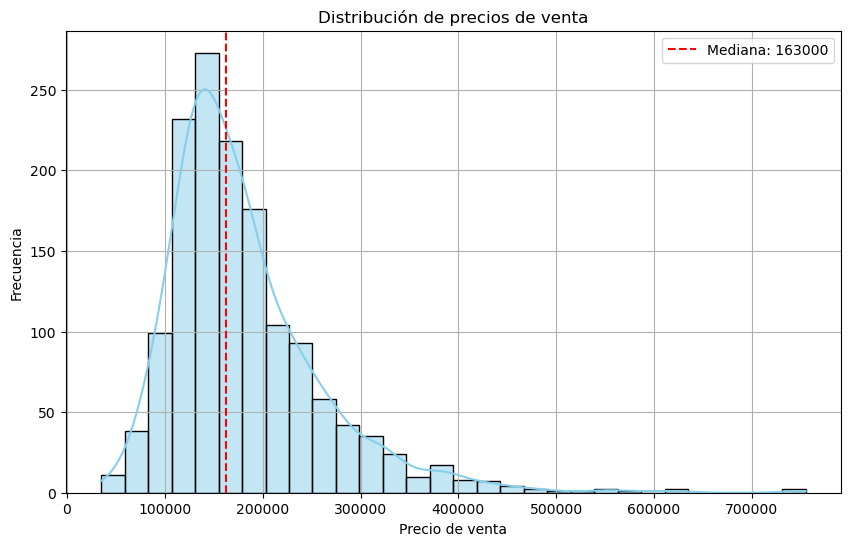

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, color='skyblue', bins=30)

plt.title('Distribución de precios de venta')
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')

# Agregar una línea vertical para la mediana
median_price = train['SalePrice'].median()
plt.axvline(median_price, color='red', linestyle='--', label=f'Mediana: {median_price:.0f}')

plt.legend()
plt.grid(True)
plt.show()

El histograma muestra la distribución de los precios de venta de viviendas en el dataset. A continuación, se destacan algunos puntos clave del análisis:

Distribución asimétrica: La distribución es claramente asimétrica positiva (sesgada a la derecha), lo que indica que la mayoría de las viviendas se concentran en precios bajos, mientras que hay menos viviendas con precios altos.

Mediana del precio: La mediana se encuentra en 163,000, lo cual es un buen indicador de tendencia central, especialmente en distribuciones no normales, ya que no se ve tan afectada por valores extremos.

Presencia de outliers: Existen viviendas con precios considerablemente más altos (hasta ~750,000), que representan outliers. Estos podrían corresponder a propiedades de lujo o casos atípicos que conviene analizar por separado.

No normalidad: La distribución no es normal, lo que puede tener implicaciones importantes al aplicar modelos estadísticos o de machine learning que asumen normalidad. Se sugiere considerar una transformación logarítmica de la variable Precio de venta para estabilizar la varianza y aproximar una distribución más simétrica.

Frecuencia alta en precios bajos: El mayor número de viviendas se encuentra en el rango de precios entre 100,000 y 200,000, siendo este el segmento predominante del mercado en el dataset.

🔍 Evaluación del modelo: Random Forest Regressor
Se entrenó un modelo de regresión utilizando Random Forest para predecir el precio de venta de viviendas. El desempeño se evaluó utilizando el Error Absoluto Medio (MAE), obteniendo el siguiente resultado:

Mean Absolute Error (MAE): 21,301.96

📌 Interpretación:
Este valor indica que, en promedio, el modelo se equivoca por unos 21,300 unidades monetarias al predecir el precio de una vivienda.

Considerando que la mediana del precio de venta es de 163,000, este error representa aproximadamente un 13% del valor central, lo cual puede considerarse razonablemente bueno dependiendo del contexto del negocio o aplicación específica.

El modelo ha logrado capturar patrones importantes del dataset, pero aún tiene margen de mejora.

__Comparación de algoritmos: Random Forest vs XGBoos__

Con el objetivo de evaluar el desempeño predictivo de diferentes enfoques de aprendizaje automático, se realizará una comparación entre dos algoritmos ampliamente utilizados en problemas de regresión: Random Forest y XGBoost

In [12]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 787.7 kB/s eta 0:03:11
   ---------------------------------------- 0.4/150.0 MB 3.4 MB/s eta 0:00:44
   ---------------------------------------- 1.1/150.0 MB 6.1 MB/s eta 0:00:25
   ---------------------------------------- 1.5/150.0 MB 7.0 MB/s eta 0:00:22
    --------------------------------------- 2.1/150.0 MB 8.3 MB/s eta 0:00:18
    --------------------------------------- 2.8/150.0 MB 9.6 MB/s eta 0:00:16
    --------------------------------------- 3.3/150.0 MB 9.7 MB/s eta 0:00:16
   - -------------------------------------- 4.1/150.0 MB 10.5 MB/s eta 0:00:14
   - -------------------------------------- 4.6/150.0 MB 10.6 MB/s eta 0:00:14
   - -------------------------------------- 5.3/150.0 MB 10.9 MB/s eta 0:00:14
   - -------------------------------------- 5.8/150.0 MB 10.9 MB/s eta 0:

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

# Cargar el conjunto de datos
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Revisión rápida de las primeras filas
print(train.head())

# Estadísticas descriptivas
print(train.describe())

# Verificar valores nulos
print(train.isnull().sum())

# Seleccionar las columnas más relevantes para el modelo
important_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 
                  'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']

# Filtrar el DataFrame con esas columnas
df_important = train[important_cols]

# Revisar los valores nulos en estas columnas
print(df_important.isnull().sum())

# Manejar los valores nulos
# Imputar valores nulos en columnas numéricas (con la mediana por ejemplo)
df_important['GarageCars'].fillna(df_important['GarageCars'].median(), inplace=True)
df_important['GarageArea'].fillna(df_important['GarageArea'].median(), inplace=True)
df_important['TotalBsmtSF'].fillna(df_important['TotalBsmtSF'].median(), inplace=True)
df_important['1stFlrSF'].fillna(df_important['1stFlrSF'].median(), inplace=True)
df_important['FullBath'].fillna(df_important['FullBath'].median(), inplace=True)
df_important['TotRmsAbvGrd'].fillna(df_important['TotRmsAbvGrd'].median(), inplace=True)
df_important['YearBuilt'].fillna(df_important['YearBuilt'].median(), inplace=True)
df_important['YearRemodAdd'].fillna(df_important['YearRemodAdd'].median(), inplace=True)

# Verificar que ya no hay valores nulos
print(df_important.isnull().sum())

# Definimos las variables X (features) y Y (target)
X = train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
Y = train['SalePrice']

# Dividir los datos en entrenamiento y prueba
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

# Crear el modelo XGBoost
model = xgb.XGBRegressor(n_estimators=100, random_state=0)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_valid)

# Evaluar el modelo
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error: {mae}")

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

C:\Users\elcar\AppData\Local\Temp\ipykernel_25448\574851056.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_important['GarageCars'].fillna(df_important['GarageCars'].median(), inplace=True)
C:\Users\elcar\AppData\Local\Temp\ipykernel_25448\574851056.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important['GarageCars'].fillna(

Se compararon dos modelos de regresión ampliamente utilizados en problemas de predicción con datos tabulares: XGBoost y Random Forest. Ambos modelos fueron entrenados con las mismas variables predictoras y bajo las mismas condiciones de división de datos (80% entrenamiento, 20% validación), utilizando como métrica de evaluación el Mean Absolute Error (MAE).

📊 Resultados
Modelo	MAE (Error Absoluto Medio)
XGBoost =	22,921.08
Random Forest	= 21,301.96

✅ Interpretación
Random Forest obtuvo un menor error absoluto medio en comparación con XGBoost, mostrando un mejor desempeño en la predicción de precios de venta en este conjunto de datos específico.

La diferencia de aproximadamente 1,619 unidades monetarias indica que, en promedio, las predicciones de Random Forest están más cerca del valor real que las de XGBoost.